<a href="https://colab.research.google.com/github/forhow/Machine_Deep_Learning/blob/main/H_exam_13_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Auto_Encoder

In [2]:
# module load
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist

In [25]:
# 간단한 모델 생성

# 입력 이미지 크기 지정
input_img = Input(shape=(784,))

# 매개변수를 사용한 Dense를 생성
encoded = Dense(32, activation='relu')(input_img) 
decoded = Dense(784, activation='sigmoid')(encoded)

# 모델 생성
autoencoder = Model(input_img, decoded)
# 784 input 받아서 출력도 784로 지정

In [26]:
print(autoencoder.summary())

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_11 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# encoder만 따로 모델 생성
encoder = Model(input_img, encoded)
print(encoder.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None


In [6]:
# decoder의 input과 output 지정
encoded_input = Input(shape=(32,))
decoder_layer = autoencoder.layers[-1]

# decoder 모델 생성
decoder = Model(encoded_input,decoder_layer(encoded_input))
print(decoder.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
autoencoder.compile(optimizer='adam', loss= 'binary_crossentropy')

In [8]:
# 입력데이터가 출력데이터로 출력되도록 하기 때문에 y data 불필요
(x_train, _),(x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# 이전까지는 정답이 있는 지도학습이었으나 - classification, regression

# 지금 사용하는 모델은 정답값이 없는 비지도학습임

In [9]:
# pre-processing

# 입력값의 scaling
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# 입력값 flatten
flatted_x_train = x_train.reshape(-1, 28*28)
flatted_x_test = x_test.reshape(-1, 28*28)

print(flatted_x_train.shape)
print(flatted_x_test.shape)

(60000, 784)
(10000, 784)


In [11]:
# 모델 학습
# 출력데이터와 입력데이터가 같도록 입력데이터로 학습
# validation 또한 test data로 검증
fit_hist = autoencoder.fit(flatted_x_train, flatted_x_train,
                           epochs= 50,
                           batch_size = 256,
                           shuffle=True,
                           validation_data = (flatted_x_test, flatted_x_test))

Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.2787 - val_loss: 0.1924
Epoch 2/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1709 - val_loss: 0.1522
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1429 - val_loss: 0.1326
Epoch 4/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1275 - val_loss: 0.1201
Epoch 5/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1171 - val_loss: 0.1116
Epoch 6/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1098 - val_loss: 0.1054
Epoch 7/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1047 - val_loss: 0.1015
Epoch 8/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1013 - val_loss: 0.0986
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0988 - val_loss: 0.0966
Epoch 10/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0972 - val_loss: 0.0952

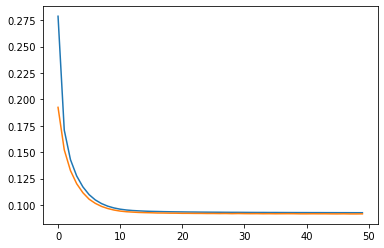

In [12]:
# loss에 대한 시각화 확인 
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

In [13]:
# test iamge encoding & decoding

encoded_img = encoder.predict(x_test[:10].reshape(-1, 784))
decoded_img = decoder.predict(encoded_img)

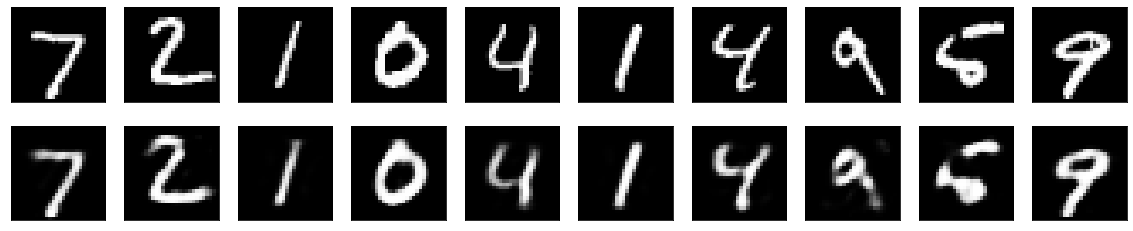

In [14]:
# 원본 이미지와 decoded 이미지 비교
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

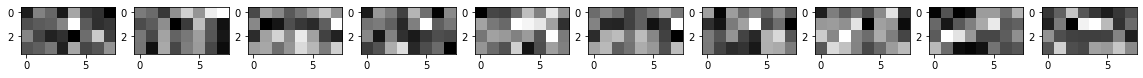

In [18]:
# encoding된 이미지 확인
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(encoded_img[i].reshape(4,8))
  plt.gray()
  plt.colormaps()
  # x, y 축 좌표 숨기기
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False)
plt.show()

# ex) 통신에 사용한다고 하면 암호화키로도 사용가능하나, 무거움
# 압축프로그램으로 사용하기에는 원본으로 정확히 복원불가

# auto encoder는 encoder와 decoder로 구성되며
# autoencoder를 학습시켜서  encoder와 decoder 모두 학습시키는 동작을 함
# 한번에 학습시킨 autoencoder내의 encoder와 decoder 를 따로 사용가능

In [20]:
print(encoded)

KerasTensor(type_spec=TensorSpec(shape=(None, 32), dtype=tf.float32, name=None), name='dense/Relu:0', description="created by layer 'dense'")


In [44]:
# 해상도를 높이기 위해 모델 쌓기

input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


In [45]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_30 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_31 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_32 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_34 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_35 (Dense)             (None, 784)               101

In [31]:
# encoder = Model(input_img, encoded)
# print(encoder.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
autoencoder.fit(flatted_x_train, flatted_x_train,
                epochs=100, batch_size=256,
                validation_data=(flatted_x_test, flatted_x_test))

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2428 - val_loss: 0.1647
Epoch 2/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1490 - val_loss: 0.1349
Epoch 3/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1293 - val_loss: 0.1222
Epoch 4/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1199 - val_loss: 0.1145
Epoch 5/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1135 - val_loss: 0.1096
Epoch 6/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1094 - val_loss: 0.1063
Epoch 7/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1064 - val_loss: 0.1036
Epoch 8/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1037 - val_loss: 0.1012
Epoch 9/100
235/235 [==============================] - 1s 4ms/step - loss: 0.1015 - val_loss: 0.0991
Epoch 10/100
235/235 [==============================] - 1s 4ms/step - loss: 0.0995 - val_lo

In [47]:
decoded_img = autoencoder.predict(flatted_x_test[:10])

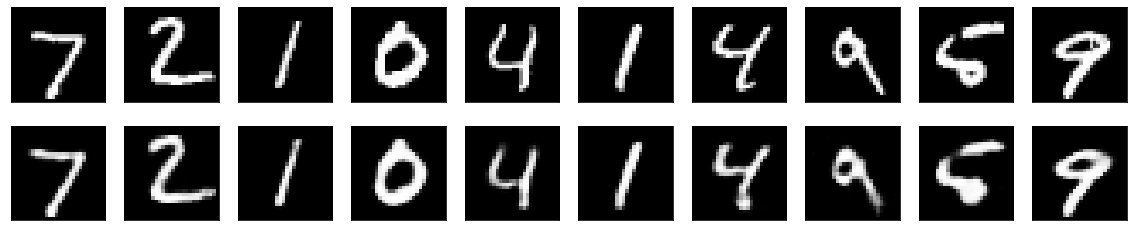

In [48]:
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [70]:
# CNN 활용

# max pooling 으로 사이즈를 줄이는 것은 가능, 늘리는 것은 불가하나
# Upsampling2D 이미지를 늘릴 수 있는 방법이 있음

Input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), padding='same', activation='relu')(Input_img)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), padding='same', activation='relu')(x)
encoded = MaxPool2D((2,2), padding='same')(x)
# x = Conv2D(8, (3,3), padding='same', activation='relu')(x)
# encoded = MaxPool2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x) # 해당하는 pixel의 값을 2x2로 늘려줌 - 해상도 손실
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
# x = Conv2D(16, (3,3), activation='relu')(x)
# x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_19 (UpSampling (None, 14, 14, 8)         0  

In [71]:
# data reshape - conv layer에 전달하기 위한 형태
conv_x_train = np.reshape(x_train, (-1, 28,28,1))
conv_x_test = np.reshape(x_test, (-1, 28,28,1))

In [81]:
autoencoder.fit(conv_x_train, conv_x_train,
                epochs = 30,
                batch_size=128,
                validation_data = (conv_x_test, conv_x_test))

Epoch 1/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0717 - val_loss: 0.0712
Epoch 2/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0716 - val_loss: 0.0710
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0716 - val_loss: 0.0709
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0715 - val_loss: 0.0708
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0714 - val_loss: 0.0708
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0714 - val_loss: 0.0707
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - val_loss: 0.0706
Epoch 8/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0713 - val_loss: 0.0706
Epoch 9/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - val_loss: 0.0706
Epoch 10/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - val_loss: 0.0707

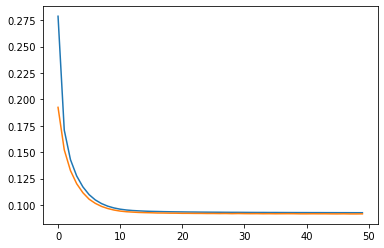

In [82]:
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

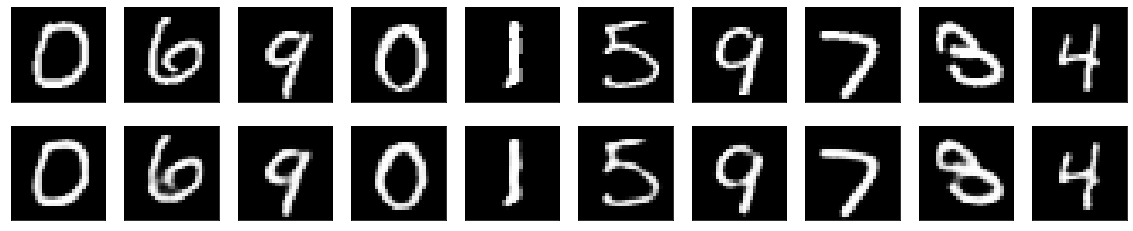

In [83]:
decoded_img = autoencoder.predict(conv_x_test[10:20])
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_img[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()


In [84]:
Input_img = Input(shape=(28,28,1))
x = Conv2D(16, (3,3), padding='same', activation='relu')(Input_img)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), padding='same', activation='relu')(x)
x = MaxPool2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3), padding='same', activation='relu')(x)
encoded = MaxPool2D((2,2), padding='same')(x)

x = Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x) # 해당하는 pixel의 값을 2x2로 늘려줌 - 해상도 손실
x = Conv2D(8, (3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3), activation='relu')(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)

autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
print(autoencoder.summary())

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 8)           0  

In [85]:
autoencoder.fit(conv_x_train, conv_x_train,
                epochs = 30,
                batch_size=128,
                validation_data = (conv_x_test, conv_x_test))

Epoch 1/30
469/469 [==============================] - 3s 6ms/step - loss: 0.2195 - val_loss: 0.1528
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1418 - val_loss: 0.1320
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1281 - val_loss: 0.1226
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1203 - val_loss: 0.1162
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1155 - val_loss: 0.1126
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1124 - val_loss: 0.1100
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1102 - val_loss: 0.1078
Epoch 8/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1084 - val_loss: 0.1064
Epoch 9/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1071 - val_loss: 0.1050
Epoch 10/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1060 - val_loss: 0.1040

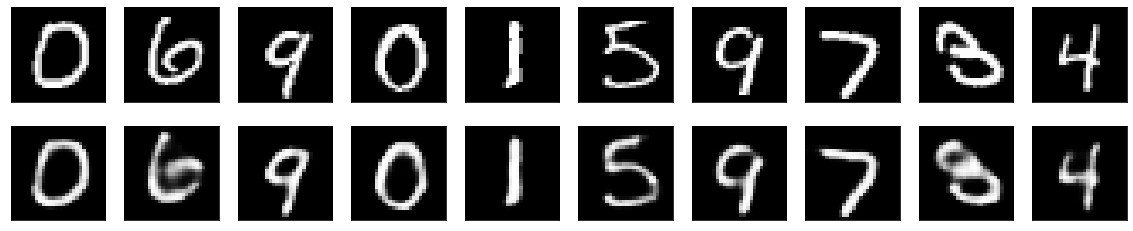

In [86]:
decoded_img = autoencoder.predict(conv_x_test[10:20])
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i+10])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i+n+1)
  plt.imshow(decoded_img[i].reshape(28,28))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()